In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data = pd.read_csv('Bank_data.csv')
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,13.0,14,14.0,15.00,29.0,-89.0,85.0,NaN,1,10,20.00,0
1,14.0,19,14.0,11.00,53.0,9.0,93.0,NaN,9,NaN,17.00,1
2,14.0,10,13.0,103.33,9.0,9.0,74.0,NaN,Current,PA,38.00,0
3,59.0,12,59.0,13.33,12.0,9.0,25.0,80,30 Days PD,46,28.05,0
4,59.0,17,59.0,NaN,9.0,9.0,67.0,NaN,0,NaN,30.00,0


In [90]:
data.shape

(2500, 12)

In [91]:
data = data.drop('H', axis = 1)
data = data.drop('I', axis = 1)
data = data.drop('J', axis = 1)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       2496 non-null   float64
 1   B       2500 non-null   int64  
 2   C       2496 non-null   float64
 3   D       2386 non-null   float64
 4   E       2289 non-null   float64
 5   F       2497 non-null   float64
 6   G       2497 non-null   float64
 7   K       2498 non-null   float64
 8   L       2500 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 175.9 KB


In [93]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
A,2496.0,27.227564,20.143978,9.0,14.00,14.0,59.0,59.00
B,2500.0,14.315200,2.651539,10.0,13.00,14.0,16.0,19.00
C,2496.0,26.760016,20.203804,9.0,14.00,14.0,59.0,59.00
D,2386.0,38.678005,32.459272,9.0,16.67,31.0,48.0,486.00
E,2289.0,46.589777,38.866938,9.0,9.00,35.0,85.0,109.00
F,2497.0,7.629555,35.660011,-90.0,9.00,9.0,9.0,109.00
G,2497.0,49.672807,27.786025,9.0,25.00,48.0,72.0,109.00
K,2498.0,23.531165,7.867665,13.1,17.00,20.0,30.0,86.12
L,2500.0,0.171600,0.377108,0.0,0.00,0.0,0.0,1.00


In [94]:
print(data.isnull().sum())

A      4
B      0
C      4
D    114
E    211
F      3
G      3
K      2
L      0
dtype: int64


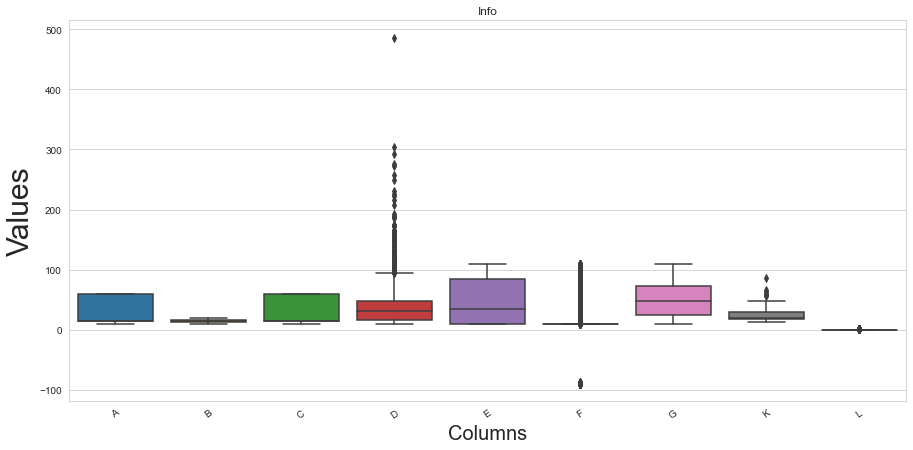

In [95]:
plt.figure(figsize=(15,7))
chart=sns.boxplot(data=data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=35)
plt.title("Info")
plt.ylabel("Values",size=30)
plt.xlabel("Columns",size=20);

In [96]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers_D = detect_outliers_zscore(data["D"])
sample_outliers_F = detect_outliers_zscore(data["F"])
sample_outliers_K = detect_outliers_zscore(data["K"])

In [97]:
median = np.median(data["D"])
for i in sample_outliers_D:
    data["D"] = np.where(data["D"]==i, median, data["D"])

median = np.median(data["F"])
for i in sample_outliers_F:
    data["F"] = np.where(data["F"]==i, median, data["F"])

median = np.median(data["K"])
for i in sample_outliers_K:
    data["K"] = np.where(data["K"]==i, median, data["K"])

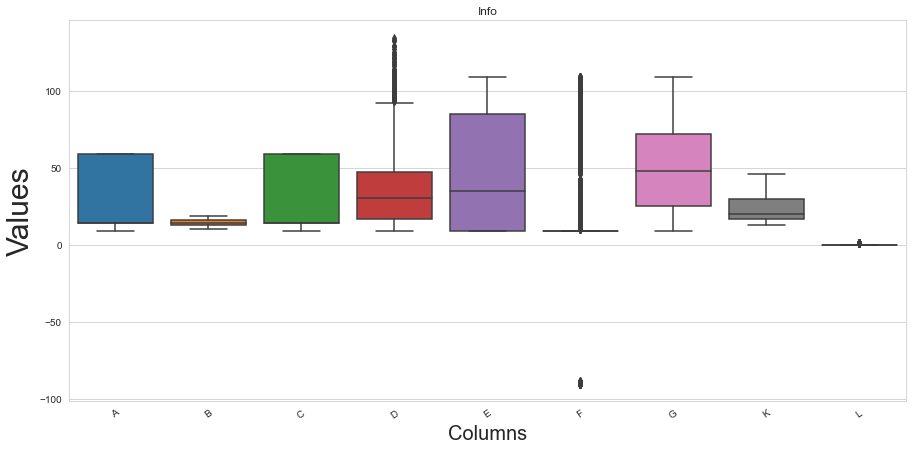

In [98]:
plt.figure(figsize=(15,7))
chart=sns.boxplot(data=data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=35)
plt.title("Info")
plt.ylabel("Values",size=30)
plt.xlabel("Columns",size=20);

In [99]:
print(data.isnull().sum())

A      4
B      0
C      4
D    155
E    211
F      3
G      3
K      9
L      0
dtype: int64


Filling Null Values


In [126]:
data["A"].fillna(data["A"].mode(),inplace=True)
data["C"].fillna(data["C"].mode(),inplace=True)
data["D"].fillna(data["D"].mode(),inplace=True)
data["E"].fillna(data["E"].mode(),inplace=True)
data["F"].fillna(data["F"].mode(),inplace=True)
data["G"].fillna(data["G"].mode(),inplace=True)
data["K"].fillna(data["K"].mode(),inplace=True)

In [127]:
print(data.isnull().sum())

A    0
B    0
C    0
D    0
E    0
F    0
G    0
K    0
L    0
dtype: int64


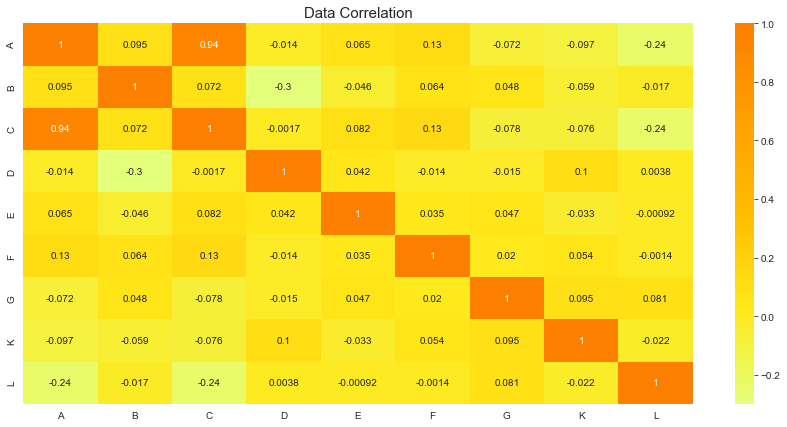

In [128]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, cmap="Wistia")
plt.title("Data Correlation", size=15)
plt.show()

C & A shows 94% Correlation

C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='L', ylabel='Density'>

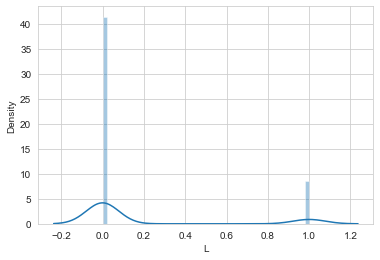

In [129]:
sns.distplot(data['L'])

Pre-Processing

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scalar = StandardScaler()

In [131]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [132]:
data["D"]=round(data["D"],1)
data["E"]=round(data["E"],1)
data["K"]=round(data["K"],1)

In [133]:
X = scalar.fit_transform(X)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

Model

In [135]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [136]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       682
           1       0.00      0.00      0.00       143

    accuracy                           0.83       825
   macro avg       0.41      0.50      0.45       825
weighted avg       0.68      0.83      0.75       825



C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
lr.coef_

array([[-0.72282061,  0.02999654, -0.21703904,  0.04907017, -0.0125698 ,
         0.10166673,  0.19757975, -0.13007736]])

In [137]:
confusion_matrix(y_test,y_pred)

array([[682,   0],
       [143,   0]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix')

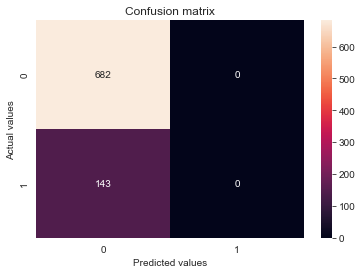

In [138]:
conf=confusion_matrix(y_test,y_pred)
conf=sns.heatmap(conf,annot=True,fmt='.4g')
conf.set_xlabel("Predicted values")
conf.set_ylabel("Actual values")
conf.set_title("Confusion matrix")

In [158]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [159]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

In [160]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [161]:
scores_log = []
scores_svm = []
scores_rf = []
scores_xgb = []
scores_dec = []

In [162]:
for train_index, test_index in kf.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    scores_log.append(get_score(LogisticRegression(),X_train, X_test, y_train, y_test ))
    scores_svm.append(get_score(SVC(),X_train, X_test, y_train, y_test ))
    scores_rf.append(get_score(RandomForestClassifier(),X_train, X_test, y_train, y_test ))
    scores_xgb.append(get_score(XGBClassifier(),X_train, X_test, y_train, y_test ))
    scores_dec.append(get_score(DecisionTreeClassifier(),X_train, X_test, y_train, y_test ))

In [163]:
print("Logistic Regression Scores:\n", scores_log)
print("SVM Scores:\n", scores_svm)
print("Random Forest Scores:\n", scores_rf)
print("XG Boost Scores:\n", scores_xgb)
print("Decision tree Scores:\n", scores_dec)

Logistic Regression Scores:
 [0.8333333333333334, 0.8427370948379351, 0.8091236494597839]
SVM Scores:
 [0.8333333333333334, 0.8427370948379351, 0.8091236494597839]
Random Forest Scores:
 [0.8177458033573142, 0.82953181272509, 0.8055222088835534]
XG Boost Scores:
 [0.7913669064748201, 0.82953181272509, 0.7827130852340937]
Decision tree Scores:
 [0.7182254196642686, 0.7478991596638656, 0.7334933973589436]


In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
from sklearn import decomposition,datasets
from sklearn.pipeline import Pipeline

pca = decomposition.PCA()
logistic_Reg = LogisticRegression()

In [178]:


pipe = Pipeline(steps=[('pca', pca),
                       ('logistic_Reg', logistic_Reg)])

In [179]:
n_components = list(range(1,X.shape[1]+1,1))

In [180]:
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [181]:
parameters = dict(pca__n_components=n_components,
                  logistic_Reg__C=C,
                  logistic_Reg__penalty=penalty)

In [185]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2000 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver =

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

In [183]:
df = pd.DataFrame(clf_GS.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic_Reg__C,param_logistic_Reg__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020001,0.034964,0.0000,0.000000,0.0001,l1,1,"{'logistic_Reg__C': 0.0001, 'logistic_Reg__pen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,800
1,0.002592,0.000498,0.0000,0.000000,0.0001,l1,2,"{'logistic_Reg__C': 0.0001, 'logistic_Reg__pen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,462
2,0.002802,0.000981,0.0000,0.000000,0.0001,l1,3,"{'logistic_Reg__C': 0.0001, 'logistic_Reg__pen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,463
3,0.003001,0.000002,0.0000,0.000000,0.0001,l1,4,"{'logistic_Reg__C': 0.0001, 'logistic_Reg__pen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,464
4,0.002402,0.000490,0.0000,0.000000,0.0001,l1,5,"{'logistic_Reg__C': 0.0001, 'logistic_Reg__pen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.005199,0.000749,0.0006,0.000490,10000.0,l2,4,"{'logistic_Reg__C': 10000.0, 'logistic_Reg__pe...",0.83,0.828,0.828,0.828,0.828,0.8284,0.0008,1
796,0.005998,0.001269,0.0002,0.000400,10000.0,l2,5,"{'logistic_Reg__C': 10000.0, 'logistic_Reg__pe...",0.83,0.828,0.828,0.828,0.828,0.8284,0.0008,1
797,0.005399,0.000489,0.0004,0.000491,10000.0,l2,6,"{'logistic_Reg__C': 10000.0, 'logistic_Reg__pe...",0.83,0.828,0.828,0.828,0.828,0.8284,0.0008,1
798,0.004600,0.001357,0.0008,0.000400,10000.0,l2,7,"{'logistic_Reg__C': 10000.0, 'logistic_Reg__pe...",0.83,0.828,0.828,0.828,0.828,0.8284,0.0008,1


In [184]:
clf_GS.best_score_

0.8283999999999999